In [1]:
import numpy as np 
import random as rand 
from numba import jit
import matplotlib.pyplot as plt 
from matplotlib.widgets import Slider

## Generalising the conjecture ##

In [2]:
def c(r_array):
    assert np.all(1<r_array), "r must be greater than 1"
    m_array = np.zeros_like(r_array)
    count_max = 100
    for i,r in enumerate(r_array):
        m = 0
        ratio = 1/r
        limit = 0
        count = 0
        while limit <= (r - 1):
            count += 1
            m += 1
            limit += 1/m
            if count > count_max:
                m = np.inf
                break
        m_array[i] = m
    return m_array

In [3]:
def d(a,k):
    return k // a

In [4]:
a = 2
r = np.linspace(1.01,100,10000)
x = 1/r
results = c(r)
def k_bound(a):
    k = (results+1)*a
    return k
#x_star = r[np.where(results == 3)][0]

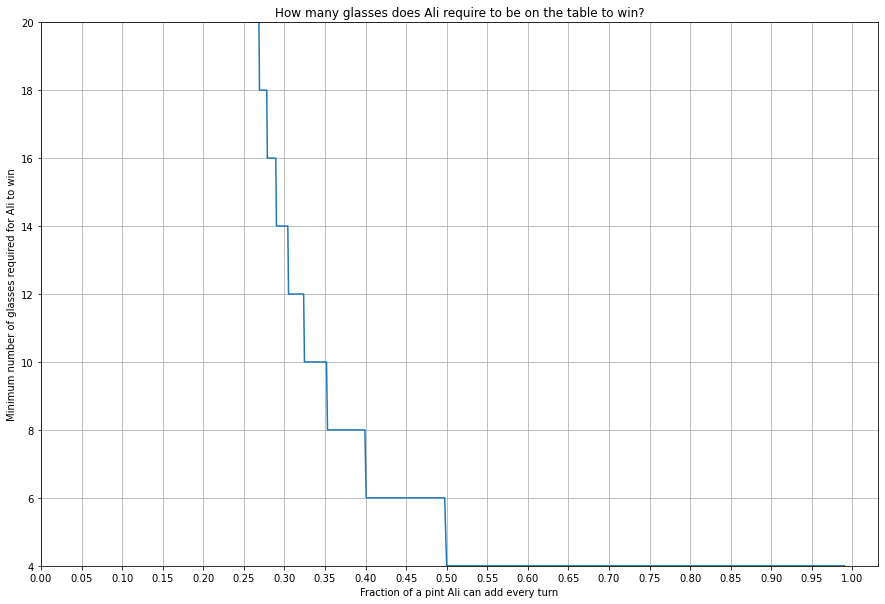

In [5]:
%matplotlib inline

plt.figure(figsize=(15,10))
plt.plot(x, k_bound(2))
plt.ylim((4-1e-5,20))
plt.grid()
plt.xticks(np.linspace(0,1,21))
plt.yticks(np.arange(4,21,2))
plt.xlabel("Fraction of a pint Ali can add every turn")
plt.ylabel("Minimum number of glasses required for Ali to win")
plt.title("How many glasses does Ali require to be on the table to win?")
plt.show()

In [6]:
%matplotlib osx

fig, ax = plt.subplots()
ax.set_xlabel("Fraction of a pint Ali can add every turn")
ax.set_ylabel("Minimum number of glasses required for Ali to win")
ax.set_title("How many glasses does Ali require to be on the table to win?")
#ax.set_ylim((2,16))
#ax.vlines(1/x_star, 2,16,'red', 'dashed', label = f'x = {1/x_star}')
plt.subplots_adjust(bottom = 0.2)
plt.grid('on')
P, = plt.plot(x, k_bound(a), label = 'Distribution of number of glasses required to win')
slider_dim = plt.axes([0.15, 0.1, 0.7, 0.02])
a_slide = Slider(slider_dim, '$a$', 1, 10,
                 valstep = 1, valinit = a)
def update(val):
    a = a_slide.val
    P.set_ydata(k_bound(a))
    fig.canvas.draw_idle()
a_slide.on_changed(update)
#plt.legend()
plt.show()

## Minimum number of moves to win ##
I can find an upper bound for the number of moves required to win

In [7]:
def n_min(r):
    m_array = c(r)
    #print(m_array)
    n0_array = np.zeros_like(m_array)
    for j,m in enumerate(m_array):
        #print(m)
        m = int(m)
        t = 1
        for i in range(1,m+1):
            t -= (1/i)*(1/r[j])
        #print(t)
        n0 = 0
        partial = 0
        #print(partial)
        while not (partial > t):
            n0 +=1
            partial += (1/2**n0)*(1/r[j])
            #print(partial)
        n0_array[j] = n0
    return n0_array

In [8]:
print(n_min(np.array([2])))

[2]


In [9]:
def min_moves(r):
    n0 = n_min(r)
    m0 = c(r)
    return m0*n0+m0

In [10]:
r2 = np.linspace(1.01,6,500)
#print(c(r2))


plt.figure(figsize=(15,10))
plt.plot(1/r2,min_moves(r2))
plt.ylabel("Number of moves for Ali to win")
plt.xlabel("Fraction of a pint Ali can add each round")
plt.title("A graph to show the upper bound on the minimum number of moves required for Ali to win")
plt.show()